In [86]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt


In [87]:
data= pd.read_csv(r'C:\Users\richardpears\Desktop\python\Datasets\Kaggle\Advertising.csv',index_col=0)
data.sample(8)

,TV,radio,newspaper,sales
61,53.5,2.0,21.4,8.1
168,206.8,5.2,19.4,12.2
142,193.7,35.4,75.6,19.2
185,253.8,21.3,30.0,17.6
14,97.5,7.6,7.2,9.7
51,199.8,3.1,34.6,11.4
126,87.2,11.8,25.9,10.6
63,239.3,15.5,27.3,15.7


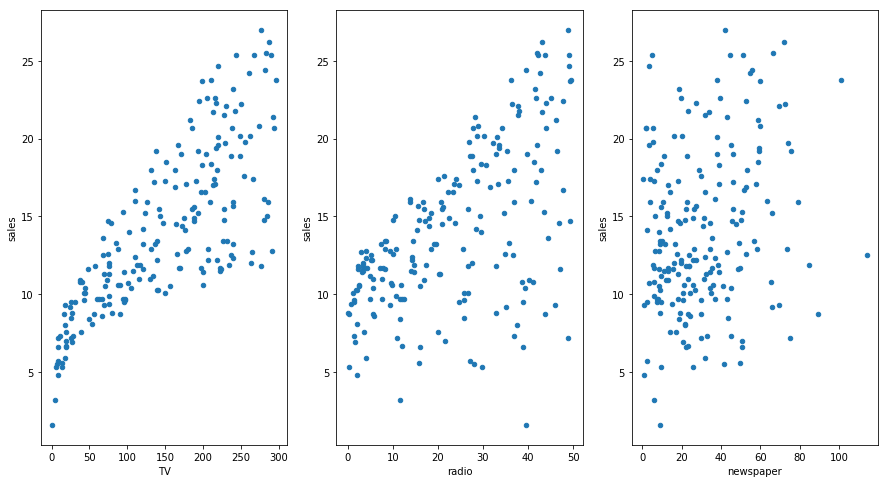

In [88]:
fig,ax=plt.subplots(1,3)

data.plot(kind='scatter',x='TV',y='sales',ax=ax[0],figsize=(15,8))
data.plot(kind='scatter',x="radio",y='sales',ax=ax[1])
data.plot(kind='scatter',x="newspaper",y='sales',ax=ax[2])

In [89]:
import statsmodels.formula.api as smf


In [90]:
lm = smf.ols(formula='sales ~ TV', data=data).fit()
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [91]:
print('if $50 spent on TV ads retun in sales according to the model would be', 7.032594 + 0.047537*50
)

if $50 spent on TV ads retun in sales according to the model would be 9.409444


In [92]:
x=pd.DataFrame({"TV":[50]})
x

,TV
0,50


In [93]:
lm.predict(x)

0    9.409426
dtype: float64

In [94]:
x=pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
x

,TV
0,0.7
1,296.4


In [95]:
pred=lm.predict(x)

In [96]:
pred

0     7.065869
1    21.122454
dtype: float64

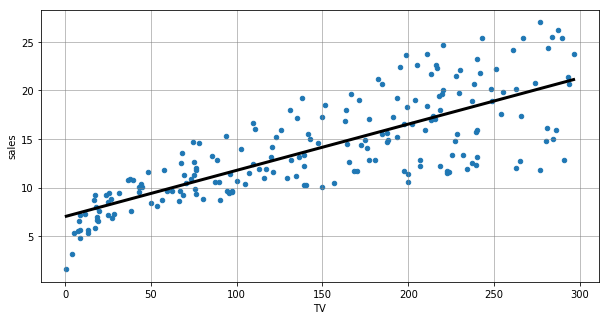

In [97]:
data.plot(kind='scatter',x="TV",y='sales',figsize=(10,5))
plt.plot(x,pred,c='black',linewidth=3)
plt.grid(color='grey', linestyle='-', linewidth=0.5)

In [98]:
lm.conf_int()


,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [99]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [100]:
[lm.rsquared,lm.rsquared_adj]

[0.611875050850071, 0.6099148238341623]

In [101]:
#multiple regression for the same data containing all the other variables

In [102]:
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()


In [103]:
lm.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
radio,0.171547,0.205513
newspaper,-0.012616,0.010541


In [104]:
lm.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [105]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 02 Jan 2019   Prob (F-statistic):           1.58e-96
Time:                        17:20:32   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared

0.8971942610828956

In [107]:
lm = smf.ols(formula='sales ~ TV  ', data=data).fit()
lm.rsquared

0.611875050850071

In [108]:
lm = smf.ols(formula='sales ~ TV + newspaper', data=data).fit()
lm.rsquared

0.6458354938293271

In [109]:
lm = smf.ols(formula='sales ~ radio  ', data=data).fit()
lm.rsquared

0.33203245544529525

In [110]:
lm = smf.ols(formula='sales ~ radio+ newspaper  ', data=data).fit()
lm.rsquared

0.33270518395032256

In [111]:
#using scikit-learn


In [112]:
variable_cols=['TV','radio','newspaper']

In [113]:
x=data[variable_cols]

In [114]:
y=data.sales

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
lm=LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
print (lm.intercept_)
print (lm.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [130]:
zip(variable_cols, lm.coef_)


In [126]:
lm.predict([100, 25, 25])


ValueError: Expected 2D array, got 1D array instead:
array=[100  25  25].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [120]:
lm.score(X, y)


NameError: name 'X' is not defined